In [1]:
from experiment import Experiment
from utils.behavior_data import BehaviorData
from visuals import Plotter
import torch
import numpy as np
from utils.state_data import StateData
import matplotlib.pyplot as plt

268 537
(6904, 63) (6904, 8)
0	 [0.21979831159114838]
5	 [0.21743954718112946]
10	 [0.21008999645709991]
15	 [0.2054918259382248]
20	 [0.2048550248146057]
25	 [0.20197241008281708]
30	 [0.1985471546649933]
35	 [0.19447630643844604]
40	 [0.1903958022594452]
45	 [0.18711817264556885]
50	 [0.1842113584280014]
55	 [0.18172717094421387]
60	 [0.17925319075584412]
65	 [0.1770971417427063]
70	 [0.17494940757751465]
75	 [0.1728518307209015]
80	 [0.171576127409935]
85	 [0.16948485374450684]
90	 [0.16846896708011627]
95	 [0.1669493168592453]
100	 [0.16506034135818481]
104	 [0.1638675183057785]
268 537
(6904, 63) (6904, 8)
0	 [0.23114389181137085]
5	 [0.21416907012462616]
10	 [0.20703096687793732]
15	 [0.2021217942237854]
20	 [0.20088918507099152]
25	 [0.19813019037246704]
30	 [0.19590887427330017]
35	 [0.19224710762500763]
40	 [0.18837140500545502]
45	 [0.18517537415027618]
50	 [0.18228954076766968]
55	 [0.17954593896865845]
60	 [0.17730502784252167]
65	 [0.1755606234073639]
70	 [0.17395342886447

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

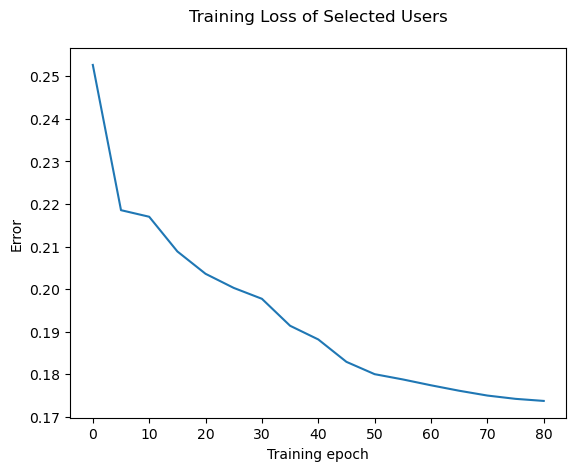

In [2]:
for respond_perc in [.5]:
# for respond_perc in [.75, .25]:
    # for estate, include_state in [(True, True)]:
    for estate, include_state, fullq in [(False, True, True)]:
        for model in ["AdaptableLSTM", "BasicNN"]:
            for learning_rate in [.012]:
                test_metrics, train_metrics, adjusted_losses = [], [], []
                epochs = 105
                if (model != "AdaptableLSTM"):
                    epochs = 80
                    learning_rate *= .2
                for seed in range(3):
                    np.random.seed(seed)
                    torch.manual_seed(seed)
                    e = Experiment(
                        numValFolds = 5,
                        data_kw={"minw": 2,
                                "maxw": 29,
                                "include_state": include_state,
                                "include_pid": False,
                                "expanded_states": estate,
                                "top_respond_perc": respond_perc,
                                 "full_questionnaire": fullq
                                },
                        model=model,
                        model_kw={
                            "lossfn": "MSELoss",
                            # "lossfn": "NDCG",
                            # "lossfn": "CrossEntropyLoss",
                            "hidden_size": 200, 
                            "opt_kw": {
                                "lr": learning_rate
                            }
                        },
                        train_kw={
                            "epochs": epochs,
                            "n_subj": 500,
                            "rec_every": 5,
                        })

                    report = e.run()



                    individual_test_scores, labels = e.report_scores_individual_test()
                    individual_train_scores, labels = e.report_scores_individual_train()



                    dire = "./experiment_output/"
                    fileprefix = f"{model}LR{learning_rate}Resp{respond_perc}States{int(include_state)}Expanded{int(estate)}"
                    np.savetxt(f"{dire}TRAINMETRICS-{fileprefix}S{seed}.csv", report["train_metrics"], delimiter = ',', header = ','.join(report['metric_labels']))
                    np.savetxt(f"{dire}TESTMETRICS-{fileprefix}S{seed}.csv", report["test_metrics"], delimiter = ',', header = ','.join(report['metric_labels']))
                    np.savetxt(f"{dire}IDVDTESTMETRICS-{fileprefix}S{seed}.csv", individual_test_scores, delimiter = ',', header = ','.join(report['metric_labels']))
                    np.savetxt(f"{dire}IDVDTRAINMETRICS-{fileprefix}S{seed}.csv", individual_train_scores, delimiter = ',', header = ','.join(report['metric_labels']))
                    np.savetxt(f"{dire}TRAINLOSSES-{fileprefix}S{seed}.csv", report["loss"], delimiter = ',')

                    preds1, preds2, preds3 = e.get_class_predictions(False)
                    
                    
                    np.savetxt(f"{dire}TRAINPREDS1-{fileprefix}S{seed}.csv", preds1, delimiter = ',')
                    np.savetxt(f"{dire}TRAINPREDS2-{fileprefix}S{seed}.csv", preds2, delimiter = ',')
                    np.savetxt(f"{dire}TRAINPREDS3-{fileprefix}S{seed}.csv", preds3, delimiter = ',')
                    
                    plt.clf()
                    splot = plt.hist(preds1)
                    plt.title("Train Predictions for Class 1")
                    plt.savefig(f"{dire}/img/C1PredsTrain-{fileprefix}S{seed}.png")
                    
                    plt.clf()
                    splot = plt.hist(preds2)
                    plt.title("Train Predictions for Class 2")
                    plt.savefig(f"{dire}/img/C2PredsTrain-{fileprefix}S{seed}.png")
                    
                    plt.clf()
                    splot = plt.hist(preds3)
                    plt.title("Train Predictions for Class 3")
                    plt.savefig(f"{dire}/img/C3PredsTrain-{fileprefix}S{seed}.png")
                    
                    preds1, preds2, preds3 = e.get_class_predictions(True)
                    
                    np.savetxt(f"{dire}TESTPREDS1-{fileprefix}S{seed}.csv", preds1, delimiter = ',')
                    np.savetxt(f"{dire}TESTPREDS2-{fileprefix}S{seed}.csv", preds2, delimiter = ',')
                    np.savetxt(f"{dire}TESTPREDS3-{fileprefix}S{seed}.csv", preds3, delimiter = ',')
                    
                    plt.clf()
                    splot = plt.hist(preds1)
                    plt.title("Test Predictions for Class 1")
                    plt.savefig(f"{dire}/img/C1PredsTest-{fileprefix}S{seed}.png")
                    
                    plt.clf()
                    splot = plt.hist(preds2)
                    plt.title("Test Predictions for Class 2")
                    plt.savefig(f"{dire}/img/C2PredsTest-{fileprefix}S{seed}.png")
                    
                    plt.clf()
                    splot = plt.hist(preds3)
                    plt.title("Test Predictions for Class 3")
                    plt.savefig(f"{dire}/img/C3PredsTest-{fileprefix}S{seed}.png")
                    
                    
                    plt.clf()
                    splot = plt.scatter(individual_test_scores[:, -1], individual_test_scores[:, labels.index("Acc")])
                    plt.title("Test Accuracy vs Response Count")
                    plt.savefig(f"{dire}/img/TestACCvResponse-{fileprefix}S{seed}.png")
                    plt.clf()
                    splot = plt.scatter(individual_train_scores[:, -1], individual_train_scores[:, labels.index("Acc")])
                    plt.title("Train Accuracy vs Response Count")
                    plt.savefig(f"{dire}/img/TrainACCvResponse-{fileprefix}S{seed}.png")
                    plt.clf()


                    writer = open(f"{dire}ALOSS-{fileprefix}.csv", "a")
                    writer.write(",".join([str(loss[0]) for loss in report["loss"]]))
                    writer.write("\n")
                    writer.close()

                    writer = open(f"{dire}FINALTRAINMETRICS-{fileprefix}.csv", "a")
                    writer.write(",".join([str(loss) for loss in report["train_metrics"][-1, :]]))
                    writer.write("\n")
                    writer.close()

                    writer = open(f"{dire}FINALTESTMETRICS-{fileprefix}.csv", "a")
                    writer.write(",".join([str(loss) for loss in report["test_metrics"][-1, :]]))
                    writer.write("\n")
                    writer.close()

                    Plotter.training_loss(report, dire)



In [3]:
labels.index("Acc")

4